<a href="https://colab.research.google.com/github/anhtran123-max/study_NeuralNetwork/blob/main/trainning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Machine_learning


/content/drive/MyDrive/Machine_learning


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

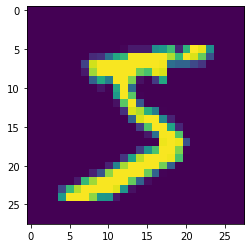

In [ ]:
plt.imshow(training_images[0])

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images[0].shape

(28, 28)

In [ ]:
training_labels[0]

5

In [ ]:
# Khởi tạo model
model = Sequential()

# Thêm một lớp tích chập + lớp Activation: relu
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)))

# Thêm một lớp Max Pooling
model.add(MaxPooling2D(2,2))

# Thêm một lớp duỗi
model.add(Flatten())

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Thêm một lớp Dense 128 + lớp Activation: relu
model.add(Dense(128,activation="relu"))

# Thêm một lớp Dense 10 + lớp Activation: Softmax
model.add(Dense(10,activation="softmax"))

# Chú ý thêm lớp Activation Softmax
# Kiểm tra lại mô hình

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images=training_images/255.0
training_images=training_images.reshape(60000,28,28,1)

### Chuẩn hóa lại dữ liệu bằng cách chia các giá trị của pixel cho 255.0
### Sử dụng test_images, test_labels để làm tập validation

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_images=test_images/255.0
test_images=test_images.reshape(10000,28,28,1)

In [ ]:
training_labels.shape

(60000,)

In [ ]:
training_labels[0]

5

In [ ]:
# Thêm một hàm tối ưu cho model

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['acc'])

# Tiến hành training

model.fit(training_images,training_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1478 - acc: 0.9563 - val_loss: 0.0553 - val_acc: 0.9814
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0494 - acc: 0.9848 - val_loss: 0.0432 - val_acc: 0.9842
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0320 - acc: 0.9900 - val_loss: 0.0418 - val_acc: 0.9853
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0439 - val_acc: 0.9859
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0143 - acc: 0.9954 - val_loss: 0.0407 - val_acc: 0.9861
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0449 - val_acc: 0.9873
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0566 - val_acc: 0.9856
Epoch 8/10
1875/1875 [==============================] - 9